In [1]:
import pandas as pd 
import numpy as np 

import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [7]:
df1_etch = pd.read_csv('Etching_000.csv')

In [17]:
cond1=df1_etch['Thin Film 3']<0
df1_etch.loc[cond1,'Thin Film 3(outlier)']=np.nan
df1_etch.loc[~cond1,'Thin Film 3(outlier)']=df1_etch['Thin Film 3']

In [18]:
cond1=df1_etch['Thin Film 4']<0
df1_etch.loc[cond1,'Thin Film 4(outlier)']=np.nan
df1_etch.loc[~cond1,'Thin Film 4(outlier)']=df1_etch['Thin Film 4']

In [19]:
df1_etch.isnull().sum()

Unnamed: 0              0
Etching_Chamber         0
Process 3               0
Temp_Etching            0
Source_Power            0
Selectivity             0
No_Die                  0
Lot_Num                 0
Wafer_Num               0
Datetime                0
Thin Film 4             1
Thin Film 3             1
Thin Film 2             1
Thin Film 1             1
Thin Film 3(outlier)    4
Thin Film 4(outlier)    4
dtype: int64

In [20]:
cond1=df1_etch['Thin Film 4(outlier)'].isnull()
df1_etch.loc[cond1]

,Unnamed: 0,Etching_Chamber,Process 3,Temp_Etching,Source_Power,Selectivity,No_Die,Lot_Num,Wafer_Num,Datetime,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1,Thin Film 3(outlier),Thin Film 4(outlier)
211,211,2,Etching,69.897,50.484,1.023,NOLSM212823,8,23,17-02-2019 PM 9:04:30,-49.0,-34.65,2.00,59.38,NaN,NaN
332,332,2,Etching,70.060,51.141,1.047,NOLSM333139,13,9,17-02-2019 PM 9:04:30,-45.0,-30.86,5.55,62.86,NaN,NaN
376,376,2,Etching,70.794,50.944,1.026,NOLSM3771426,14,26,17-02-2019 PM 9:04:30,-18.0,-2.73,34.28,91.30,NaN,NaN
702,702,2,Etching,72.289,51.790,1.045,NOLSM703271,27,1,17-02-2019 PM 9:04:30,NaN,NaN,NaN,NaN,NaN,NaN


- 결측치 처리 
    - 제거 
    - 대치 : 평균/중앙값과 같은 대표값을 대치 
           : 알고리즘을 이용해, 주변 row값을 참고하여 대치 (impute)

In [25]:
# 결측치 제거
df1_etch2=df1_etch.dropna()
df1_etch2.isnull().sum()

Unnamed: 0              0
Etching_Chamber         0
Process 3               0
Temp_Etching            0
Source_Power            0
Selectivity             0
No_Die                  0
Lot_Num                 0
Wafer_Num               0
Datetime                0
Thin Film 4             0
Thin Film 3             0
Thin Film 2             0
Thin Film 1             0
Thin Film 3(outlier)    0
Thin Film 4(outlier)    0
dtype: int64

In [27]:
# 결측치 대치
df1_etch['Thin Film 4(missing)']=df1_etch['Thin Film 4(outlier)'].fillna(0)

cond1=df1_etch['Thin Film 4(outlier)'].isnull()
df1_etch.loc[cond1]

,Unnamed: 0,Etching_Chamber,Process 3,Temp_Etching,Source_Power,Selectivity,No_Die,Lot_Num,Wafer_Num,Datetime,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1,Thin Film 3(outlier),Thin Film 4(outlier),Thin Film 4(missing)
211,211,2,Etching,69.897,50.484,1.023,NOLSM212823,8,23,17-02-2019 PM 9:04:30,-49.0,-34.65,2.00,59.38,NaN,NaN,0.0
332,332,2,Etching,70.060,51.141,1.047,NOLSM333139,13,9,17-02-2019 PM 9:04:30,-45.0,-30.86,5.55,62.86,NaN,NaN,0.0
376,376,2,Etching,70.794,50.944,1.026,NOLSM3771426,14,26,17-02-2019 PM 9:04:30,-18.0,-2.73,34.28,91.30,NaN,NaN,0.0
702,702,2,Etching,72.289,51.790,1.045,NOLSM703271,27,1,17-02-2019 PM 9:04:30,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [29]:
# 평균으로 대치해보기
df1_etch['Thin Film 4(missing2)']=df1_etch['Thin Film 4(outlier)']\
                                    .fillna(df1_etch['Thin Film 4(outlier)'].mean())

cond1=df1_etch['Thin Film 4(outlier)'].isnull()
df1_etch.loc[cond1]

,Unnamed: 0,Etching_Chamber,Process 3,Temp_Etching,Source_Power,Selectivity,No_Die,Lot_Num,Wafer_Num,Datetime,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1,Thin Film 3(outlier),Thin Film 4(outlier),Thin Film 4(missing),Thin Film 4(missing2)
211,211,2,Etching,69.897,50.484,1.023,NOLSM212823,8,23,17-02-2019 PM 9:04:30,-49.0,-34.65,2.00,59.38,NaN,NaN,0.0,297.814858
332,332,2,Etching,70.060,51.141,1.047,NOLSM333139,13,9,17-02-2019 PM 9:04:30,-45.0,-30.86,5.55,62.86,NaN,NaN,0.0,297.814858
376,376,2,Etching,70.794,50.944,1.026,NOLSM3771426,14,26,17-02-2019 PM 9:04:30,-18.0,-2.73,34.28,91.30,NaN,NaN,0.0,297.814858
702,702,2,Etching,72.289,51.790,1.045,NOLSM703271,27,1,17-02-2019 PM 9:04:30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,297.814858


<AxesSubplot:xlabel='Thin Film 4(outlier)', ylabel='Count'>

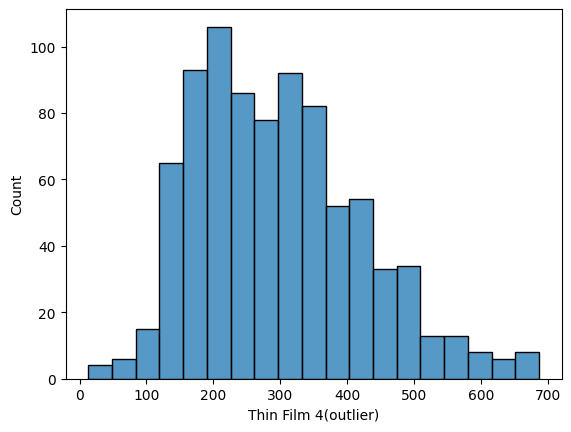

In [31]:
sns.histplot(df1_etch, x='Thin Film 4(outlier)')

In [34]:
# 일반적인 경우에는 시간순서대로 데이터가 쌓이게 됨.
# 그래서 주변에 있는 값으로 결측치를 대체해주는 기능을 사용하는 경우도 있음

In [32]:
# 이전행의 결과를 가져와서 결측치 채움
df1_etch.fillna(method='ffill')

,Unnamed: 0,Etching_Chamber,Process 3,Temp_Etching,Source_Power,Selectivity,No_Die,Lot_Num,Wafer_Num,Datetime,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1,Thin Film 3(outlier),Thin Film 4(outlier),Thin Film 4(missing),Thin Film 4(missing2)
0,0,3,Etching,70.878,50.851,1.047,NOLSM111,1,1,17-02-2019 PM 9:04:30,251.0,267.06,303.82,361.38,267.06,251.0,251.0,251.0
1,1,2,Etching,69.561,52.283,1.051,NOLSM212,1,2,17-02-2019 PM 9:04:30,317.0,332.74,369.31,426.11,332.74,317.0,317.0,317.0
2,2,1,Etching,70.968,51.610,1.017,NOLSM313,1,3,17-02-2019 PM 9:04:30,411.0,424.21,460.65,517.80,424.21,411.0,411.0,411.0
3,3,1,Etching,70.146,51.286,1.027,NOLSM414,1,4,17-02-2019 PM 9:04:30,256.0,272.28,308.56,365.93,272.28,256.0,256.0,256.0
4,4,2,Etching,71.174,51.996,1.050,NOLSM515,1,5,17-02-2019 PM 9:04:30,419.0,434.98,471.65,528.85,434.98,419.0,419.0,419.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,847,3,Etching,71.550,50.601,1.015,NOLSM8483211,32,11,17-02-2019 PM 9:04:30,177.0,192.10,228.65,285.91,192.10,177.0,177.0,177.0
848,848,3,Etching,70.718,50.424,1.011,NOLSM8493212,32,12,17-02-2019 PM 9:04:30,180.0,194.33,230.76,287.66,194.33,180.0,180.0,180.0
849,849,2,Etching,71.295,50.602,1.015,NOLSM8503213,32,13,17-02-2019 PM 9:04:30,142.0,156.72,193.21,250.21,156.72,142.0,142.0,142.0
850,850,1,Etching,71.199,50.544,1.014,NOLSM8513214,32,14,17-02-2019 PM 9:04:30,127.0,140.41,176.87,234.09,140.41,127.0,127.0,127.0


In [33]:
# 다음행의 결과를 가져와서 결측치 채움
df1_etch.fillna(method='bfill')

,Unnamed: 0,Etching_Chamber,Process 3,Temp_Etching,Source_Power,Selectivity,No_Die,Lot_Num,Wafer_Num,Datetime,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1,Thin Film 3(outlier),Thin Film 4(outlier),Thin Film 4(missing),Thin Film 4(missing2)
0,0,3,Etching,70.878,50.851,1.047,NOLSM111,1,1,17-02-2019 PM 9:04:30,251.0,267.06,303.82,361.38,267.06,251.0,251.0,251.0
1,1,2,Etching,69.561,52.283,1.051,NOLSM212,1,2,17-02-2019 PM 9:04:30,317.0,332.74,369.31,426.11,332.74,317.0,317.0,317.0
2,2,1,Etching,70.968,51.610,1.017,NOLSM313,1,3,17-02-2019 PM 9:04:30,411.0,424.21,460.65,517.80,424.21,411.0,411.0,411.0
3,3,1,Etching,70.146,51.286,1.027,NOLSM414,1,4,17-02-2019 PM 9:04:30,256.0,272.28,308.56,365.93,272.28,256.0,256.0,256.0
4,4,2,Etching,71.174,51.996,1.050,NOLSM515,1,5,17-02-2019 PM 9:04:30,419.0,434.98,471.65,528.85,434.98,419.0,419.0,419.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,847,3,Etching,71.550,50.601,1.015,NOLSM8483211,32,11,17-02-2019 PM 9:04:30,177.0,192.10,228.65,285.91,192.10,177.0,177.0,177.0
848,848,3,Etching,70.718,50.424,1.011,NOLSM8493212,32,12,17-02-2019 PM 9:04:30,180.0,194.33,230.76,287.66,194.33,180.0,180.0,180.0
849,849,2,Etching,71.295,50.602,1.015,NOLSM8503213,32,13,17-02-2019 PM 9:04:30,142.0,156.72,193.21,250.21,156.72,142.0,142.0,142.0
850,850,1,Etching,71.199,50.544,1.014,NOLSM8513214,32,14,17-02-2019 PM 9:04:30,127.0,140.41,176.87,234.09,140.41,127.0,127.0,127.0
